In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




In [2]:
import pandas as pd
import missingno as ms
from pandas_profiling import ProfileReport
import numpy as np
import re
from sklearn import tree
import os
import datetime 







/Users/keweichen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import EC_utilities.EC_Scoring.EC_JupyterNoteBook_Setting as IDE

from EC_utilities.EC_Scoring.EC_Base import *
from EC_utilities.EC_Scoring.EC_DataStep import *
from EC_utilities.EC_Scoring.EC_FeaturesSelection import *
from EC_utilities.EC_Scoring.EC_MachineLearning import *

from EC_utilities.scikitplot import *



from Eric_utilites.Eric_DataDrop import *
from Eric_utilites.Eric_DataProcessing import *



pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',200)

Datafolder = 'Data'
Inputfolder = 'Inputfolder'
hdf_name = 'Data_final.h5'


hdf_output_path = f_PathFileName(Datafolder,hdf_name)

filename = 'df_final0907.csv'

In [4]:
df = pd.read_csv(os.path.join(Inputfolder,filename), low_memory=False,sep = '|',dtype={'CASE_ID':str})
df = df.drop(columns = 'Unnamed: 0')

df['CASE_Y'] = df['CASE_ID'].str[0:2].astype(int)
df['CASE_M'] = df['CASE_ID'].str[2:4].astype(int)

## 以 CASE_ID 與 CASEBASE_CP_ID 作為 key 
df = df.set_index(['CASE_ID','CASEBASE_CP_ID'])

In [5]:
######## 欄位篩選概覽 #######
## 原始資料欄位數目:      1283 
## 擴增資料欄位數目
#### -進出口實績欄位:       9
#### -企業排名     :      18
#### -土地與工廠面積:       2
#### -徵信報告資訊:        7
#### -欄位貼標:           11
## 整併後料欄位數目:      1330(1283 + 9 + 18 + 2 + 7 + 11) (欄位缺值比率為 0 為 143 個、缺值比率為 1 的共 34 個)

####### 欄位篩選與擴增 ######
## 欄位篩選:             670 (342/1330)
##########################

df.shape

(213817, 550)

In [6]:
df.head()

,,CASEBASE_CPCN1,CASEBASE_CPEN1,CASEBASE_BILLAR,CASEBASE_TAXNUM,CASEBASE_CEMPL,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_BUSTYPE,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_OFFICEAR,CASEBASE_REGISTMONEY,CASEBASE_REGISTDIRECT,CASEBASE_OPENINGTIME,CASEBASE_CPJN1,CASEBASE_CCOUNTYOE,CASEBASE_CCAPCURR,CASEBASE_LICENSE,CASEBASE_NACE_ID,CASEBASE_NACE_CNAME,CASEBASE_SIC_ID,CASEBASE_SIC_CNAME,CASEBASE_DEFRANK,CASEBASE_CCOMPSTATE,CASEBASE_NPL_IND,CASEBASE_NPL,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_BFNAME,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_COOPEIN,CASEBASE1_COOPEOUT,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATER,CASEBASE1_OPEOFFER,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_MPLOFFER,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_PAWNNUM,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALEAMT,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STDADAY,CASEBASE1_STDA,CASEBASE1_STDP,CASEBASE1_STUSDAY,CASEBASE1_STUS,CASEBASE1_STTT,CASEBASE1_STOADAY,CASEBASE1_STOA,CASEBASE1_COTHER,CASEBASE1_STOTHER,CASEBASE1_STOTHERTMP,CASEBASE1_STUFFOUT,CASEBASE1_CCOUNTY,CASEBASE1_ADDRNO,CASEBASE1_ADDRNONO,CASEBASE1_REGADDR,CASEBASE1_HISTORYLIST,CASEBASE1_SALEITEMM1,CASEBASE1_SALEITEMM2,CASEBASE1_CCAPTDOLL,CASEBASE1_OPEPRIZEOFFER,CASEBASE1_BOARD,CASEBASE1_CSALEDOLL,CASEBASE1_STOTHERDAY,CASEBASE1_CORGTYPE,CASEBASE1_CSTOCKSTATE,CASEBASE1_STOCKNO,CASEBASE1_ONEEXPLAIN,CASEBASE1_PAYDAY,CASEBASE1_CHISTORYCHANGE1,CASEBASE1_OPEOFFER_SEX,CASEBASE1_OPEOFFER1,CASEBASE1_OPEOFFER1_SEX,CASEBASE1_ISMERGER1,CASEBASE1_ISMERGER2,CASEBASE1_ISMERGER3,CASEBASE1_NETINAMT,CASEBASE1_STOCKPRICE_YM,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSDADAY,CASEBASE2_PSDA,CASEBASE2_PSDP,CASEBASE2_PSUSDAY,CASEBASE2_PSUS,CASEBASE2_PSTT,CASEBASE2_PSOADAY,CASEBASE2_PSOA,CASEBASE2_COTHER,CASEBASE2_PSOTHER,CASEBASE2_PSOTHERTMP,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_BILLDATE,CASEBASE2_COMPBILL,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_REFUND,CASEBASE2_REJECTREC,CASEBASE2_REJECT,CASEBASE2_REJECTNO,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACE,CASEBASE2_PLACENAME,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_BUSNAME,CASEBASE2_BUSNAME2,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINDATE2,CASEBASE2_FINDATE3,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_TAXY1,CASEBASE2_TAXY2,CASEBASE2_TAXY3,CASEBASE2_CPATYPE,CASEBASE2_CPAY1,CASEBASE2_CPAY2,CASEBASE2_CPAY3,CASEBASE2_COMPTYPE,CASEBASE2_COMPY1,CASEBASE2_COMPY2,CASEBASE2_COMPY3,CASEBASE2_HISNEWS,CASEBASE2_NEWS,CASEBASE2_PRIZE,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_CDOLLTYPE,CASEBASE2_RPTTYPE,CASEBASE2_CTRANDATE,CASEBASE2_PSOTHERDAY,CASEBASE2_PUBLIC1,CASEBASE2_MPUBLIC1,CASEBASE2_MPUBLIC,CASEBASE2_CCREDITPAY,CASEBASE2_CREDITPAYDAY,CASEBASE2_PAYHISTORY,CASEBASE2_PAYHISTORY2,CASEBASE2_NOFINRPT,CASEBASE2_FINSTATENAME,CASEBASE2_MAXCREDIT,CASEBASE2_CMAXCURRENCY,CASEBASE2_MAXMONEY,CASEBASE2_PROCREDIT,CASEBASE2_ASSET,CASEBASE2_AFTERTAX,CASEBASE2_FUNDDAY,CASEBASE2_SALEDAY,CASEBASE2_CDOLLTYPE1,CASEBASE2_CFINSTATE1,CASEBASE2_CFINSTATE2,CASEBASE2_CFINSTATE3,CASEBASE2_AQUICK1,CASEBASE2_LQUICK1,CASEBASE2_LKEEP1,CASEBASE2_AQUICK2,CASEBASE2_LQUICK2,CASEBASE2_LKEEP2,CASEBASE2_AQUICK3,CASEBASE2_LQUICK3,CASEBASE2_LKEEP3,CASEBASE2_NGETMSTOCK,CASEBASE2_STOCK1,CASEBASE2_STOCK2,CASEBASE2_STOCK3,CASEBASE2_SHOWTYPE,CASEBASE2_FINDATEM1,CASEBASE2_FINDATEM2,CASEBASE2_FINDATEM3,CASEBASE2_FINANCIALM,CASEBASE2_AQUICKM1,CASEBASE2_LQUICKM1,CASEBASE2_LKEEPM1,CASEBASE2_AQUICKM2,CASEBASE2_LQUICKM2,CASEBASE2_LKEEPM2,CASEBASE2_AQUICKM3,CASEBASE2_LQUICKM3,CASEBASE2_LKEEPM3,CASEBASE2_STOCKM1,CASEBASE2_STOCKM2,CASEBASE2_STOCKM3,CASEBASE2_TAXTYPEM,CASEBASE2_TAXYM1,CASEBASE2_TAXYM2,CASEBASE2_TAXYM3,CASEBASE2_CPATYPEM,CASEBASE2_CPAYM1,

In [7]:
df.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 213817 entries, ('0801110001', 'C0460780') to ('1905990030', 'C17A0362')
Data columns (total 550 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CASEBASE_CPCN1              213806 non-null  object 
 1   CASEBASE_CPEN1              210282 non-null  object 
 2   CASEBASE_BILLAR             213762 non-null  object 
 3   CASEBASE_TAXNUM             212526 non-null  object 
 4   CASEBASE_CEMPL              64340 non-null   object 
 5   CASEBASE_EMPLNUM            213817 non-null  object 
 6   CASEBASE_BUILDATE           213357 non-null  object 
 7   CASEBASE_CCOMPTYPE          213018 non-null  object 
 8   CASEBASE_CBUSKIND           213525 non-null  object 
 9   CASEBASE_BUSTYPE            213806 non-null  object 
 10  CASEBASE_RANK               157581 non-null  object 
 11  CASEBASE_LEGAL              213791 non-null  float64
 12  CASEBASE_OFFICEAR         

In [8]:
# 只抓出 有 labelling 的資料
Data = df

In [9]:
Data.shape
Data.head()

(213817, 550)

,,CASEBASE_CPCN1,CASEBASE_CPEN1,CASEBASE_BILLAR,CASEBASE_TAXNUM,CASEBASE_CEMPL,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_BUSTYPE,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_OFFICEAR,CASEBASE_REGISTMONEY,CASEBASE_REGISTDIRECT,CASEBASE_OPENINGTIME,CASEBASE_CPJN1,CASEBASE_CCOUNTYOE,CASEBASE_CCAPCURR,CASEBASE_LICENSE,CASEBASE_NACE_ID,CASEBASE_NACE_CNAME,CASEBASE_SIC_ID,CASEBASE_SIC_CNAME,CASEBASE_DEFRANK,CASEBASE_CCOMPSTATE,CASEBASE_NPL_IND,CASEBASE_NPL,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_BFNAME,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_COOPEIN,CASEBASE1_COOPEOUT,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATER,CASEBASE1_OPEOFFER,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_MPLOFFER,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_PAWNNUM,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALEAMT,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STDADAY,CASEBASE1_STDA,CASEBASE1_STDP,CASEBASE1_STUSDAY,CASEBASE1_STUS,CASEBASE1_STTT,CASEBASE1_STOADAY,CASEBASE1_STOA,CASEBASE1_COTHER,CASEBASE1_STOTHER,CASEBASE1_STOTHERTMP,CASEBASE1_STUFFOUT,CASEBASE1_CCOUNTY,CASEBASE1_ADDRNO,CASEBASE1_ADDRNONO,CASEBASE1_REGADDR,CASEBASE1_HISTORYLIST,CASEBASE1_SALEITEMM1,CASEBASE1_SALEITEMM2,CASEBASE1_CCAPTDOLL,CASEBASE1_OPEPRIZEOFFER,CASEBASE1_BOARD,CASEBASE1_CSALEDOLL,CASEBASE1_STOTHERDAY,CASEBASE1_CORGTYPE,CASEBASE1_CSTOCKSTATE,CASEBASE1_STOCKNO,CASEBASE1_ONEEXPLAIN,CASEBASE1_PAYDAY,CASEBASE1_CHISTORYCHANGE1,CASEBASE1_OPEOFFER_SEX,CASEBASE1_OPEOFFER1,CASEBASE1_OPEOFFER1_SEX,CASEBASE1_ISMERGER1,CASEBASE1_ISMERGER2,CASEBASE1_ISMERGER3,CASEBASE1_NETINAMT,CASEBASE1_STOCKPRICE_YM,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSDADAY,CASEBASE2_PSDA,CASEBASE2_PSDP,CASEBASE2_PSUSDAY,CASEBASE2_PSUS,CASEBASE2_PSTT,CASEBASE2_PSOADAY,CASEBASE2_PSOA,CASEBASE2_COTHER,CASEBASE2_PSOTHER,CASEBASE2_PSOTHERTMP,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_BILLDATE,CASEBASE2_COMPBILL,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_REFUND,CASEBASE2_REJECTREC,CASEBASE2_REJECT,CASEBASE2_REJECTNO,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACE,CASEBASE2_PLACENAME,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_BUSNAME,CASEBASE2_BUSNAME2,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINDATE2,CASEBASE2_FINDATE3,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_TAXY1,CASEBASE2_TAXY2,CASEBASE2_TAXY3,CASEBASE2_CPATYPE,CASEBASE2_CPAY1,CASEBASE2_CPAY2,CASEBASE2_CPAY3,CASEBASE2_COMPTYPE,CASEBASE2_COMPY1,CASEBASE2_COMPY2,CASEBASE2_COMPY3,CASEBASE2_HISNEWS,CASEBASE2_NEWS,CASEBASE2_PRIZE,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_CDOLLTYPE,CASEBASE2_RPTTYPE,CASEBASE2_CTRANDATE,CASEBASE2_PSOTHERDAY,CASEBASE2_PUBLIC1,CASEBASE2_MPUBLIC1,CASEBASE2_MPUBLIC,CASEBASE2_CCREDITPAY,CASEBASE2_CREDITPAYDAY,CASEBASE2_PAYHISTORY,CASEBASE2_PAYHISTORY2,CASEBASE2_NOFINRPT,CASEBASE2_FINSTATENAME,CASEBASE2_MAXCREDIT,CASEBASE2_CMAXCURRENCY,CASEBASE2_MAXMONEY,CASEBASE2_PROCREDIT,CASEBASE2_ASSET,CASEBASE2_AFTERTAX,CASEBASE2_FUNDDAY,CASEBASE2_SALEDAY,CASEBASE2_CDOLLTYPE1,CASEBASE2_CFINSTATE1,CASEBASE2_CFINSTATE2,CASEBASE2_CFINSTATE3,CASEBASE2_AQUICK1,CASEBASE2_LQUICK1,CASEBASE2_LKEEP1,CASEBASE2_AQUICK2,CASEBASE2_LQUICK2,CASEBASE2_LKEEP2,CASEBASE2_AQUICK3,CASEBASE2_LQUICK3,CASEBASE2_LKEEP3,CASEBASE2_NGETMSTOCK,CASEBASE2_STOCK1,CASEBASE2_STOCK2,CASEBASE2_STOCK3,CASEBASE2_SHOWTYPE,CASEBASE2_FINDATEM1,CASEBASE2_FINDATEM2,CASEBASE2_FINDATEM3,CASEBASE2_FINANCIALM,CASEBASE2_AQUICKM1,CASEBASE2_LQUICKM1,CASEBASE2_LKEEPM1,CASEBASE2_AQUICKM2,CASEBASE2_LQUICKM2,CASEBASE2_LKEEPM2,CASEBASE2_AQUICKM3,CASEBASE2_LQUICKM3,CASEBASE2_LKEEPM3,CASEBASE2_STOCKM1,CASEBASE2_STOCKM2,CASEBASE2_STOCKM3,CASEBASE2_TAXTYPEM,CASEBASE2_TAXYM1,CASEBASE2_TAXYM2,CASEBASE2_TAXYM3,CASEBASE2_CPATYPEM,CASEBASE2_CPAYM1,

# 資料剖析

<AxesSubplot:>

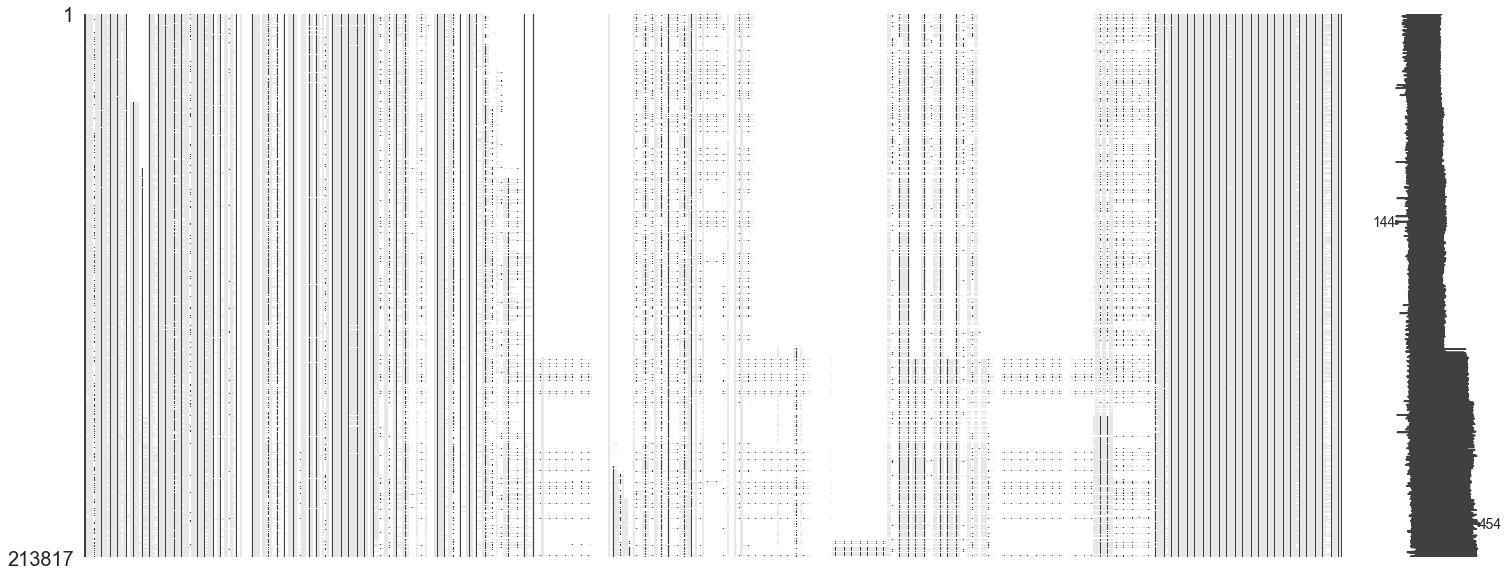

In [10]:
# 載入 {missingno} 模組
#   https://github.com/ResidentMario/missingno
import missingno as msno

msno.matrix(Data)

In [11]:
#msno.bar(Data)

In [12]:
#msno.heatmap(Data)

In [13]:
#msno.dendrogram(Data)

# 資料轉換

In [14]:
## 轉換進出口實績之資料
# 將 ''>10','<5','>','-','--','---','----' 取代為 NA
# 將 <0.05 取代為 0 
# 則其他 'XX-XX' 的形式的數值，取其最大值


for i in range(1,4):
    for j in range(2,4):
        col = 'CASEINOUT_{}_INOUT{}'.format(j,i)
        if col in Data.columns:
            Data.loc[:,col] = Data.loc[:,col].replace(['>10','<5','>','-','--','---','----'],np.nan)
            Data.loc[:,col] = Data.loc[:,col].replace(['<0.05'],'0')
            Data.loc[:,col] = pd.to_numeric(Data.loc[:,col].apply(lambda x : re.split('-| ',str(x).strip())).apply(lambda x : max(x)),errors='coerce')


<AxesSubplot:>

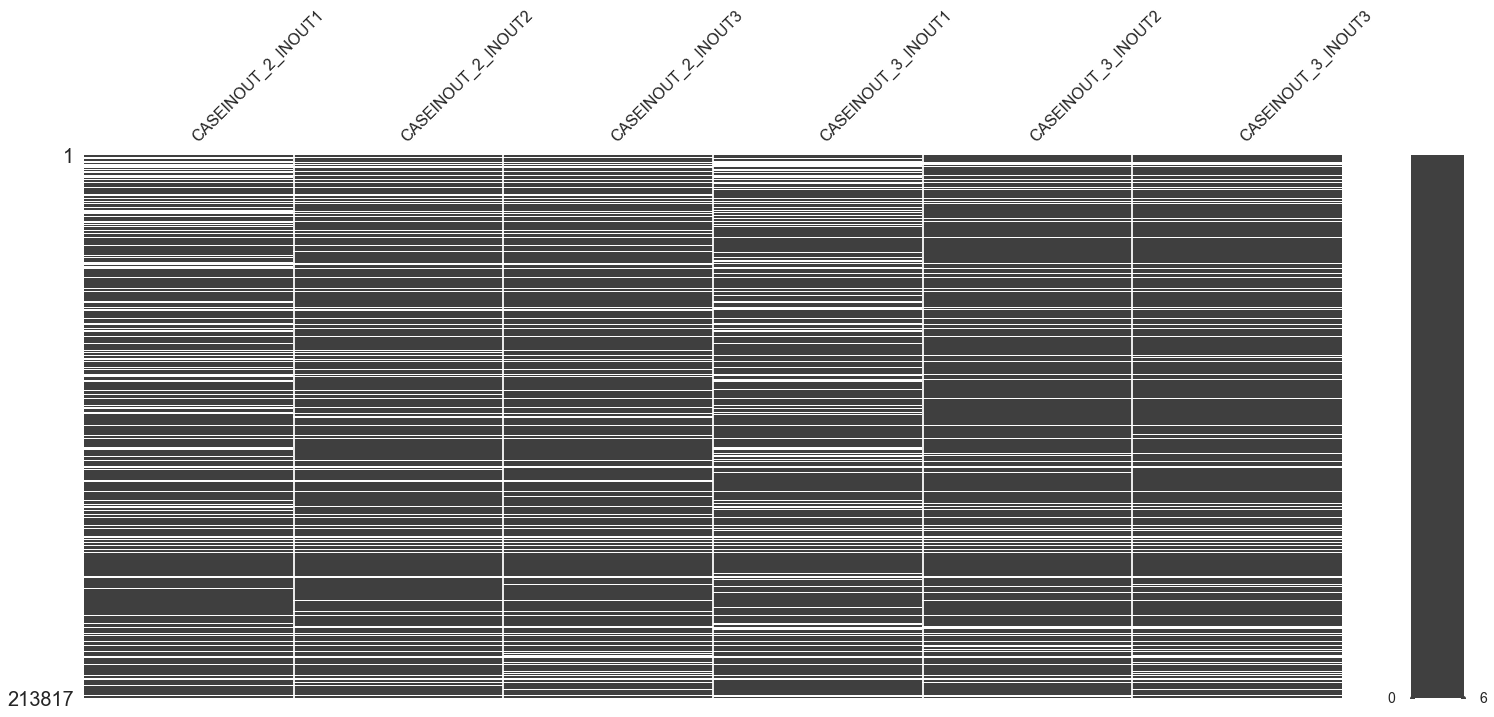

In [15]:
## 不考慮排名

ms.matrix(Data[['CASEINOUT_2_INOUT1','CASEINOUT_2_INOUT2', #'CASEINOUT_INOUT1_1',
        'CASEINOUT_2_INOUT3','CASEINOUT_3_INOUT1', #'CASEINOUT_INOUT2_1',
        'CASEINOUT_3_INOUT2','CASEINOUT_3_INOUT3']])



In [16]:
## 以 n-1 年的進出口實績數值，填補 n 年前的進出口時間數值
for i in range(2,4):
    a = 'CASEINOUT_{}_INOUT1'.format(i)
    b = 'CASEINOUT_{}_INOUT2'.format(i)
    Data[a] = Data[a].fillna(Data[b])

In [17]:
Data.head()

,,CASEBASE_CPCN1,CASEBASE_CPEN1,CASEBASE_BILLAR,CASEBASE_TAXNUM,CASEBASE_CEMPL,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_BUSTYPE,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_OFFICEAR,CASEBASE_REGISTMONEY,CASEBASE_REGISTDIRECT,CASEBASE_OPENINGTIME,CASEBASE_CPJN1,CASEBASE_CCOUNTYOE,CASEBASE_CCAPCURR,CASEBASE_LICENSE,CASEBASE_NACE_ID,CASEBASE_NACE_CNAME,CASEBASE_SIC_ID,CASEBASE_SIC_CNAME,CASEBASE_DEFRANK,CASEBASE_CCOMPSTATE,CASEBASE_NPL_IND,CASEBASE_NPL,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_BFNAME,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_COOPEIN,CASEBASE1_COOPEOUT,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATER,CASEBASE1_OPEOFFER,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_MPLOFFER,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_PAWNNUM,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALEAMT,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STDADAY,CASEBASE1_STDA,CASEBASE1_STDP,CASEBASE1_STUSDAY,CASEBASE1_STUS,CASEBASE1_STTT,CASEBASE1_STOADAY,CASEBASE1_STOA,CASEBASE1_COTHER,CASEBASE1_STOTHER,CASEBASE1_STOTHERTMP,CASEBASE1_STUFFOUT,CASEBASE1_CCOUNTY,CASEBASE1_ADDRNO,CASEBASE1_ADDRNONO,CASEBASE1_REGADDR,CASEBASE1_HISTORYLIST,CASEBASE1_SALEITEMM1,CASEBASE1_SALEITEMM2,CASEBASE1_CCAPTDOLL,CASEBASE1_OPEPRIZEOFFER,CASEBASE1_BOARD,CASEBASE1_CSALEDOLL,CASEBASE1_STOTHERDAY,CASEBASE1_CORGTYPE,CASEBASE1_CSTOCKSTATE,CASEBASE1_STOCKNO,CASEBASE1_ONEEXPLAIN,CASEBASE1_PAYDAY,CASEBASE1_CHISTORYCHANGE1,CASEBASE1_OPEOFFER_SEX,CASEBASE1_OPEOFFER1,CASEBASE1_OPEOFFER1_SEX,CASEBASE1_ISMERGER1,CASEBASE1_ISMERGER2,CASEBASE1_ISMERGER3,CASEBASE1_NETINAMT,CASEBASE1_STOCKPRICE_YM,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSDADAY,CASEBASE2_PSDA,CASEBASE2_PSDP,CASEBASE2_PSUSDAY,CASEBASE2_PSUS,CASEBASE2_PSTT,CASEBASE2_PSOADAY,CASEBASE2_PSOA,CASEBASE2_COTHER,CASEBASE2_PSOTHER,CASEBASE2_PSOTHERTMP,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_BILLDATE,CASEBASE2_COMPBILL,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_REFUND,CASEBASE2_REJECTREC,CASEBASE2_REJECT,CASEBASE2_REJECTNO,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACE,CASEBASE2_PLACENAME,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_BUSNAME,CASEBASE2_BUSNAME2,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINDATE2,CASEBASE2_FINDATE3,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_TAXY1,CASEBASE2_TAXY2,CASEBASE2_TAXY3,CASEBASE2_CPATYPE,CASEBASE2_CPAY1,CASEBASE2_CPAY2,CASEBASE2_CPAY3,CASEBASE2_COMPTYPE,CASEBASE2_COMPY1,CASEBASE2_COMPY2,CASEBASE2_COMPY3,CASEBASE2_HISNEWS,CASEBASE2_NEWS,CASEBASE2_PRIZE,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_CDOLLTYPE,CASEBASE2_RPTTYPE,CASEBASE2_CTRANDATE,CASEBASE2_PSOTHERDAY,CASEBASE2_PUBLIC1,CASEBASE2_MPUBLIC1,CASEBASE2_MPUBLIC,CASEBASE2_CCREDITPAY,CASEBASE2_CREDITPAYDAY,CASEBASE2_PAYHISTORY,CASEBASE2_PAYHISTORY2,CASEBASE2_NOFINRPT,CASEBASE2_FINSTATENAME,CASEBASE2_MAXCREDIT,CASEBASE2_CMAXCURRENCY,CASEBASE2_MAXMONEY,CASEBASE2_PROCREDIT,CASEBASE2_ASSET,CASEBASE2_AFTERTAX,CASEBASE2_FUNDDAY,CASEBASE2_SALEDAY,CASEBASE2_CDOLLTYPE1,CASEBASE2_CFINSTATE1,CASEBASE2_CFINSTATE2,CASEBASE2_CFINSTATE3,CASEBASE2_AQUICK1,CASEBASE2_LQUICK1,CASEBASE2_LKEEP1,CASEBASE2_AQUICK2,CASEBASE2_LQUICK2,CASEBASE2_LKEEP2,CASEBASE2_AQUICK3,CASEBASE2_LQUICK3,CASEBASE2_LKEEP3,CASEBASE2_NGETMSTOCK,CASEBASE2_STOCK1,CASEBASE2_STOCK2,CASEBASE2_STOCK3,CASEBASE2_SHOWTYPE,CASEBASE2_FINDATEM1,CASEBASE2_FINDATEM2,CASEBASE2_FINDATEM3,CASEBASE2_FINANCIALM,CASEBASE2_AQUICKM1,CASEBASE2_LQUICKM1,CASEBASE2_LKEEPM1,CASEBASE2_AQUICKM2,CASEBASE2_LQUICKM2,CASEBASE2_LKEEPM2,CASEBASE2_AQUICKM3,CASEBASE2_LQUICKM3,CASEBASE2_LKEEPM3,CASEBASE2_STOCKM1,CASEBASE2_STOCKM2,CASEBASE2_STOCKM3,CASEBASE2_TAXTYPEM,CASEBASE2_TAXYM1,CASEBASE2_TAXYM2,CASEBASE2_TAXYM3,CASEBASE2_CPATYPEM,CASEBASE2_CPAYM1,

In [18]:
## 針對「員工人數」的欄位，將其轉換成數值，
## 將包含 '-' 的數值，以 '-' 進行 split 並且取其最大值

idx_nonnumeric = ~Data['CASEBASE_EMPLNUM'].str.strip().str.isnumeric()
Data[idx_nonnumeric]['CASEBASE_EMPLNUM'].shape
Data[idx_nonnumeric]['CASEBASE_EMPLNUM']

Data.loc[idx_nonnumeric,'CASEBASE_EMPLNUM'] = Data[idx_nonnumeric]['CASEBASE_EMPLNUM'].str.split('-')

Data.loc[idx_nonnumeric,'CASEBASE_EMPLNUM'] = Data.loc[idx_nonnumeric,'CASEBASE_EMPLNUM'].apply(lambda x : max(x))

Data['CASEBASE_EMPLNUM'] = pd.to_numeric(Data['CASEBASE_EMPLNUM'])



(205,)

CASE_ID     CASEBASE_CP_ID
0801110103  C0810144            60-70
0801110111  C0460630             5-10
0801110268  C0810460            40-50
0801120003  C0370770             7-10
0801120047  C94602D5            40-45
                               ...   
1102120007  C0220489            10-15
1105120174  C0610052            10-20
1207140055  C02B0683              5-8
1301160020  C08A0445              3-5
1503120441  C0320545          110-130
Name: CASEBASE_EMPLNUM, Length: 205, dtype: object

In [19]:
# 將欄位 CASEBASE_BUILDATE 公司創立時間，轉換成公司的存續時間長度(年)
# 公司持續期間 CASEBASE_BUILDATE

Data['CASEBASE_BUILDATE'] = datetime.datetime.now().year - pd.to_datetime(Data['CASEBASE_BUILDATE']).dt.year



In [20]:
# 股東人數 CASEBASE1_STOCKER
# # 股東人數包含「數」、「餘」等字眼，須將其轉換
# df.query('CASEBASE1_STOCKER == "數"').head()

In [21]:
# 股東人數 CASEBASE1_STOCKER
# 將 「數」轉換成  ?? << 待確認
# 將「數十」轉換成 ?? << 待確認
# 將 「多」轉換成 ?? << 待確認

Data['CASEBASE1_STOCKER'].unique()


Data['CASEBASE1_STOCKER'] = pd.to_numeric(Data.CASEBASE1_STOCKER.str.extract('(\d+)')[0])
Data['CASEBASE1_STOCKER'].unique()




array(['0', '5', '4', '7', '98', '3', '1', '10', '8', '19', '108', '13',
       '12', '2', '15', '60', '18', '30', '100', '9', '6', '33', '45',
       '多', nan, '90', '17', '20', '113', '84', '26', '400', '40', '25',
       '55', '85', '1200', '131', '22', '20多', '14', '75', '32', '11',
       '80', '21', '16', '39', '28', '數', '35', '101', '38', '29', '10多',
       '-', '24', '50餘', '約700', '31', '50', '58', '200', '44', '210',
       '800', '27', '192', '300', '62', '105', '655', '65', '34', '246',
       '157', '23', '91', '68', '159', '375', '43274', '180', '數十', '70',
       '190', '47', '250', '215', '552', '61', '410', '129', '95', '64',
       '41', '120', '10餘', '43', '81', '46', '42', '359', '422', '790',
       '97', '287', '500', '107', '285', '509', '110', '56', '145',
       '1300', '83', '.', '0.1', '52'], dtype=object)

array([0.0000e+00, 5.0000e+00, 4.0000e+00, 7.0000e+00, 9.8000e+01,
       3.0000e+00, 1.0000e+00, 1.0000e+01, 8.0000e+00, 1.9000e+01,
       1.0800e+02, 1.3000e+01, 1.2000e+01, 2.0000e+00, 1.5000e+01,
       6.0000e+01, 1.8000e+01, 3.0000e+01, 1.0000e+02, 9.0000e+00,
       6.0000e+00, 3.3000e+01, 4.5000e+01,        nan, 9.0000e+01,
       1.7000e+01, 2.0000e+01, 1.1300e+02, 8.4000e+01, 2.6000e+01,
       4.0000e+02, 4.0000e+01, 2.5000e+01, 5.5000e+01, 8.5000e+01,
       1.2000e+03, 1.3100e+02, 2.2000e+01, 1.4000e+01, 7.5000e+01,
       3.2000e+01, 1.1000e+01, 8.0000e+01, 2.1000e+01, 1.6000e+01,
       3.9000e+01, 2.8000e+01, 3.5000e+01, 1.0100e+02, 3.8000e+01,
       2.9000e+01, 2.4000e+01, 5.0000e+01, 7.0000e+02, 3.1000e+01,
       5.8000e+01, 2.0000e+02, 4.4000e+01, 2.1000e+02, 8.0000e+02,
       2.7000e+01, 1.9200e+02, 3.0000e+02, 6.2000e+01, 1.0500e+02,
       6.5500e+02, 6.5000e+01, 3.4000e+01, 2.4600e+02, 1.5700e+02,
       2.3000e+01, 9.1000e+01, 6.8000e+01, 1.5900e+02, 3.7500e

In [22]:
## 將  CASEPLIST 進行轉換


In [23]:
## 承交天數修改 ## 轉換天數

ColumnsPayDay = ['CASEBASE2_PSDADAY','CASEBASE2_PSUSDAY','CASEBASE2_PSOADAY',
                 'CASEBASE1_STDADAY','CASEBASE1_STUSDAY','CASEBASE1_STOADAY']


In [24]:
## 將缺值替換成零：
## 動產抵押擔保數目 CASEBASE1_PAWNNUM 

#Data['CASEBASE1_PAWNNUM'] = Data['CASEBASE1_PAWNNUM'].fillna(0)


In [25]:
## 企業分類階層
Data['CASEBASE_CCOMPTYPE'].unique()


array(['大型企業', '中型企業', '超大型企業', '小型企業', '中小型企業', '社團法人', '政府大型機構', nan,
       '財團法人', '不詳', '境外企業', '大型醫院', '辦事處', '非企業', '政府機構'], dtype=object)

In [26]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 213817 entries, ('0801110001', 'C0460780') to ('1905990030', 'C17A0362')
Data columns (total 550 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   CASEBASE_CPCN1              object 
 1   CASEBASE_CPEN1              object 
 2   CASEBASE_BILLAR             object 
 3   CASEBASE_TAXNUM             object 
 4   CASEBASE_CEMPL              object 
 5   CASEBASE_EMPLNUM            int64  
 6   CASEBASE_BUILDATE           float64
 7   CASEBASE_CCOMPTYPE          object 
 8   CASEBASE_CBUSKIND           object 
 9   CASEBASE_BUSTYPE            object 
 10  CASEBASE_RANK               object 
 11  CASEBASE_LEGAL              float64
 12  CASEBASE_OFFICEAR           object 
 13  CASEBASE_REGISTMONEY        float64
 14  CASEBASE_REGISTDIRECT       object 
 15  CASEBASE_OPENINGTIME        float64
 16  CASEBASE_CPJN1              object 
 17  CASEBASE_CCOUNTYOE          object 
 18  CASEBASE_CCAPCURR 

In [27]:
Data['Y_OPERATE2'].count()
Data['Y_OPERATE2'].fillna(Data['Y_OPERATE3']).count()

Data['Y_OPERATE2'] = Data['Y_OPERATE2'].fillna(Data['Y_OPERATE3'])

115062

115070

In [28]:
Data.shape


(213817, 550)

<AxesSubplot:>

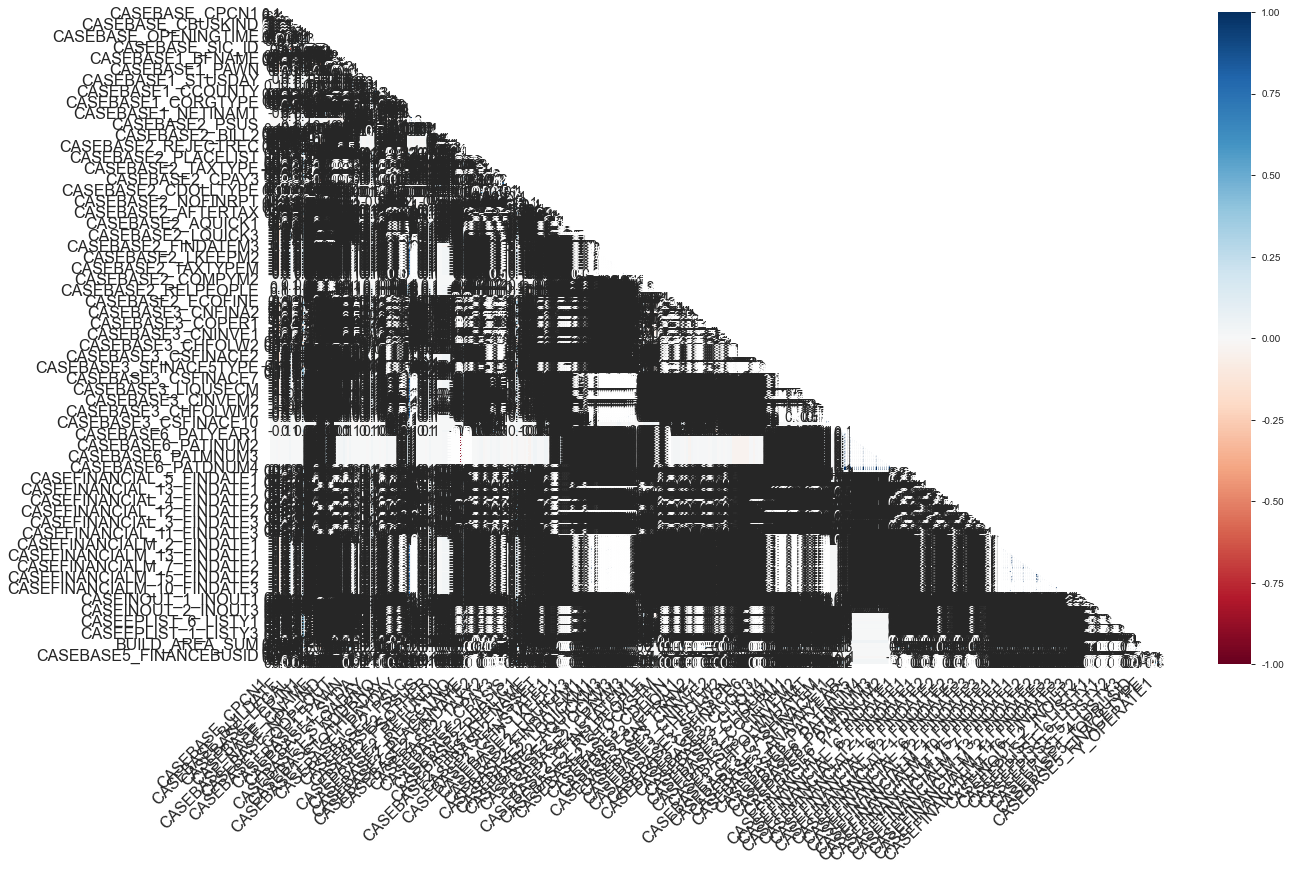

In [29]:
ms.heatmap(Data)

In [30]:
# Data.to_hdf('Data.hdf4','data')

In [31]:
## 產業代號，選取前四碼
Data['CASEBASE_BUSTYPE_4'] = Data['CASEBASE_BUSTYPE'].str[0:4]
Data['CASEBASE_BUSTYPE_4'].nunique()


235

In [32]:
Data['CASEBASE1_CSALEDOLL'].isna().sum()

47480

In [38]:
Data.to_csv('Data.csv')


# Model Data


In [39]:
Data_final = pd.DataFrame(Data.query('(CASEBASE1_CCAPTDOLL == "新台幣") and (CASEBASE_CCAPCURR == "新台幣") and (CASEBASE1_CSALEDOLL == "新台幣")'))

Data_final = pd.DataFrame(Data_final.loc[Data_final['Flag_CFINSTATE1'] == 2,:])

Data_final.shape


(127747, 551)

In [40]:
Data_final.head()

,,CASEBASE_CPCN1,CASEBASE_CPEN1,CASEBASE_BILLAR,CASEBASE_TAXNUM,CASEBASE_CEMPL,CASEBASE_EMPLNUM,CASEBASE_BUILDATE,CASEBASE_CCOMPTYPE,CASEBASE_CBUSKIND,CASEBASE_BUSTYPE,CASEBASE_RANK,CASEBASE_LEGAL,CASEBASE_OFFICEAR,CASEBASE_REGISTMONEY,CASEBASE_REGISTDIRECT,CASEBASE_OPENINGTIME,CASEBASE_CPJN1,CASEBASE_CCOUNTYOE,CASEBASE_CCAPCURR,CASEBASE_LICENSE,CASEBASE_NACE_ID,CASEBASE_NACE_CNAME,CASEBASE_SIC_ID,CASEBASE_SIC_CNAME,CASEBASE_DEFRANK,CASEBASE_CCOMPSTATE,CASEBASE_NPL_IND,CASEBASE_NPL,CASEBASE1_FACTORY,CASEBASE1_CONGLOME,CASEBASE1_HISTYPE,CASEBASE1_BFNAME,CASEBASE1_HISTORY,CASEBASE1_SALEITEM,CASEBASE1_CAPTIAL,CASEBASE1_COOPEIN,CASEBASE1_COOPEOUT,CASEBASE1_STOCKER,CASEBASE1_STOCKH,CASEBASE1_OPERATER,CASEBASE1_OPEOFFER,CASEBASE1_OPERATE,CASEBASE1_MPLANT,CASEBASE1_MPLOFFER,CASEBASE1_PROCPLANT,CASEBASE1_PAWN,CASEBASE1_PAWNNUM,CASEBASE1_RATEY1,CASEBASE1_RATEY2,CASEBASE1_RATEY3,CASEBASE1_GPY1,CASEBASE1_GPY2,CASEBASE1_OPENYEAR,CASEBASE1_SALEAMT,CASEBASE1_SALESTAT,CASEBASE1_STUFFIN,CASEBASE1_STLC,CASEBASE1_STDADAY,CASEBASE1_STDA,CASEBASE1_STDP,CASEBASE1_STUSDAY,CASEBASE1_STUS,CASEBASE1_STTT,CASEBASE1_STOADAY,CASEBASE1_STOA,CASEBASE1_COTHER,CASEBASE1_STOTHER,CASEBASE1_STOTHERTMP,CASEBASE1_STUFFOUT,CASEBASE1_CCOUNTY,CASEBASE1_ADDRNO,CASEBASE1_ADDRNONO,CASEBASE1_REGADDR,CASEBASE1_HISTORYLIST,CASEBASE1_SALEITEMM1,CASEBASE1_SALEITEMM2,CASEBASE1_CCAPTDOLL,CASEBASE1_OPEPRIZEOFFER,CASEBASE1_BOARD,CASEBASE1_CSALEDOLL,CASEBASE1_STOTHERDAY,CASEBASE1_CORGTYPE,CASEBASE1_CSTOCKSTATE,CASEBASE1_STOCKNO,CASEBASE1_ONEEXPLAIN,CASEBASE1_PAYDAY,CASEBASE1_CHISTORYCHANGE1,CASEBASE1_OPEOFFER_SEX,CASEBASE1_OPEOFFER1,CASEBASE1_OPEOFFER1_SEX,CASEBASE1_ISMERGER1,CASEBASE1_ISMERGER2,CASEBASE1_ISMERGER3,CASEBASE1_NETINAMT,CASEBASE1_STOCKPRICE_YM,CASEBASE2_STUFFIN2,CASEBASE2_PSLC,CASEBASE2_PSDADAY,CASEBASE2_PSDA,CASEBASE2_PSDP,CASEBASE2_PSUSDAY,CASEBASE2_PSUS,CASEBASE2_PSTT,CASEBASE2_PSOADAY,CASEBASE2_PSOA,CASEBASE2_COTHER,CASEBASE2_PSOTHER,CASEBASE2_PSOTHERTMP,CASEBASE2_STUFFOUT2,CASEBASE2_BANK,CASEBASE2_BILL1,CASEBASE2_BILL2,CASEBASE2_BILL3,CASEBASE2_BILLDATE,CASEBASE2_COMPBILL,CASEBASE2_PRESBILL,CASEBASE2_REFUND0,CASEBASE2_REFUND1,CASEBASE2_REFUND2,CASEBASE2_REFUND3,CASEBASE2_REFUND4,CASEBASE2_REFUND,CASEBASE2_REJECTREC,CASEBASE2_REJECT,CASEBASE2_REJECTNO,CASEBASE2_LAWSUITREC,CASEBASE2_LAWSUIT,CASEBASE2_PATENT,CASEBASE2_PANTENTNO,CASEBASE2_PLACE,CASEBASE2_PLACENAME,CASEBASE2_PLACELIST,CASEBASE2_PLACENUM,CASEBASE2_BUSNAME,CASEBASE2_BUSNAME2,CASEBASE2_EPLIST,CASEBASE2_INOUT,CASEBASE2_FINDATE2,CASEBASE2_FINDATE3,CASEBASE2_FINANCIAL,CASEBASE2_FINSTATE,CASEBASE2_TAXTYPE,CASEBASE2_TAXY1,CASEBASE2_TAXY2,CASEBASE2_TAXY3,CASEBASE2_CPATYPE,CASEBASE2_CPAY1,CASEBASE2_CPAY2,CASEBASE2_CPAY3,CASEBASE2_COMPTYPE,CASEBASE2_COMPY1,CASEBASE2_COMPY2,CASEBASE2_COMPY3,CASEBASE2_HISNEWS,CASEBASE2_NEWS,CASEBASE2_PRIZE,CASEBASE2_BASIS,CASEBASE2_PROPOSAL,CASEBASE2_CDOLLTYPE,CASEBASE2_RPTTYPE,CASEBASE2_CTRANDATE,CASEBASE2_PSOTHERDAY,CASEBASE2_PUBLIC1,CASEBASE2_MPUBLIC1,CASEBASE2_MPUBLIC,CASEBASE2_CCREDITPAY,CASEBASE2_CREDITPAYDAY,CASEBASE2_PAYHISTORY,CASEBASE2_PAYHISTORY2,CASEBASE2_NOFINRPT,CASEBASE2_FINSTATENAME,CASEBASE2_MAXCREDIT,CASEBASE2_CMAXCURRENCY,CASEBASE2_MAXMONEY,CASEBASE2_PROCREDIT,CASEBASE2_ASSET,CASEBASE2_AFTERTAX,CASEBASE2_FUNDDAY,CASEBASE2_SALEDAY,CASEBASE2_CDOLLTYPE1,CASEBASE2_CFINSTATE1,CASEBASE2_CFINSTATE2,CASEBASE2_CFINSTATE3,CASEBASE2_AQUICK1,CASEBASE2_LQUICK1,CASEBASE2_LKEEP1,CASEBASE2_AQUICK2,CASEBASE2_LQUICK2,CASEBASE2_LKEEP2,CASEBASE2_AQUICK3,CASEBASE2_LQUICK3,CASEBASE2_LKEEP3,CASEBASE2_NGETMSTOCK,CASEBASE2_STOCK1,CASEBASE2_STOCK2,CASEBASE2_STOCK3,CASEBASE2_SHOWTYPE,CASEBASE2_FINDATEM1,CASEBASE2_FINDATEM2,CASEBASE2_FINDATEM3,CASEBASE2_FINANCIALM,CASEBASE2_AQUICKM1,CASEBASE2_LQUICKM1,CASEBASE2_LKEEPM1,CASEBASE2_AQUICKM2,CASEBASE2_LQUICKM2,CASEBASE2_LKEEPM2,CASEBASE2_AQUICKM3,CASEBASE2_LQUICKM3,CASEBASE2_LKEEPM3,CASEBASE2_STOCKM1,CASEBASE2_STOCKM2,CASEBASE2_STOCKM3,CASEBASE2_TAXTYPEM,CASEBASE2_TAXYM1,CASEBASE2_TAXYM2,CASEBASE2_TAXYM3,CASEBASE2_CPATYPEM,CASEBASE2_CPAYM1,

In [41]:
Data_final.to_hdf(hdf_output_path,key = 'start_data',format='t')


In [42]:
Data_col_summary = f_NASummary(Data_final)

In [44]:
col_summary_filename = f_PathFileName(Inputfolder,'Data_final_col_summary.xlsx')

Data_col_summary.to_excel(col_summary_filename,index=False)